# Laboratorio 6

* Asuma que las operaciones requieren alta precisión.
* Presente su solución con el nombre `lab6_codigoPUCP.ipynb`

In [17]:
import numpy
ns = 2**numpy.arange(5,15)

a) Implementar (en un único archivo) cuatro funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [18]:
%%file lib_funciones.c
double func_1(unsigned long long N, double *matrix){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i++){
        ac = ac + matrix[i];
    }
    return ac;
}
double func_2(unsigned long long N, double *matrix){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=2){
        ac = ac + matrix[i] + matrix[i+1];
    }
    return ac;
}
double func_3(unsigned long long N, double *matrix){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=3){
        ac = ac + matrix[i] + matrix[i+1] + matrix[i+2];
    }
    return ac;
}
double func_4(unsigned long long N, double *matrix){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=4){
        ac = ac + matrix[i] + matrix[i+1] + matrix[i+2] + matrix[i+3];
    }
    return ac;
}

Overwriting lib_funciones.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [19]:

! gcc -fPIC -shared lib_funciones.c -o lib_funciones.so

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [20]:
import ctypes

def llamado_c():
    lib =ctypes.CDLL("./lib_funciones.so")
    lib.func_1.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_1.restype = ctypes.c_double
    lib.func_2.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_2.restype = ctypes.c_double
    lib.func_3.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_3.restype = ctypes.c_double
    lib.func_4.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_4.restype = ctypes.c_double
    return lib.func_1, lib.func_2, lib.func_3, lib.func_4

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [21]:
funcion1, funcion2, funcion3, funcion4 = llamado_c()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [22]:
n = ns[0]
A = numpy.random.rand(n,n)
Y = A.flatten()
print(funcion1(n,Y))
print(funcion2(n, Y))
print(funcion3 (n, Y))
print(funcion4(n,Y))
#Para elejir el tipo de dato, utilice la funcion type para saber que tipo de dato tienen los valores de entrada que voy a usar
print(type(n))
print(type(Y[0]))

513.6588608016152
513.6588608016152
513.6588608016152
513.6588608016152
<class 'numpy.int64'>
<class 'numpy.float64'>


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. (0.25 ptos)

In [23]:
n = ns[-1]
A = numpy.random.rand(n,n)
Y = A.flatten()
print(funcion1(n,Y))
print(funcion2(n, Y))
print(funcion3 (n, Y))
print(funcion4(n,Y))

134213017.99366927
134213017.99366927
134213017.99366927
134213017.99366927


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 20 mediciones será la mediana. (0.5 ptos)

In [24]:
import time
import statistics
iter = 50
medianas_f1 = []
medianas_f2 = []
medianas_f3 = []
medianas_f4 = []
for n in ns:
    time_f1 = []
    time_f2 = []
    time_f3 = []
    time_f4 = []
    A = numpy.random.rand(n,n)
    Y = A.flatten()
    for i in range(iter):
        tic5 = time.perf_counter()
        funcion4(n,Y)
        tic4 = time.perf_counter()
        funcion3(n,Y)
        tic3 = time.perf_counter()
        funcion2(n,Y)
        tic2 = time.perf_counter()
        funcion1(n,Y)
        tic1 = time.perf_counter()
        time_f4.append(1e6*(tic4-tic5))
        time_f3.append(1e6*(tic3-tic4))
        time_f2.append(1e6*(tic2-tic3))
        time_f1.append(1e6*(tic1-tic2))
    medianas_f1.append(statistics.median(time_f1))
    medianas_f2.append(statistics.median(time_f2))
    medianas_f3.append(statistics.median(time_f3))
    medianas_f4.append(statistics.median(time_f4))

h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

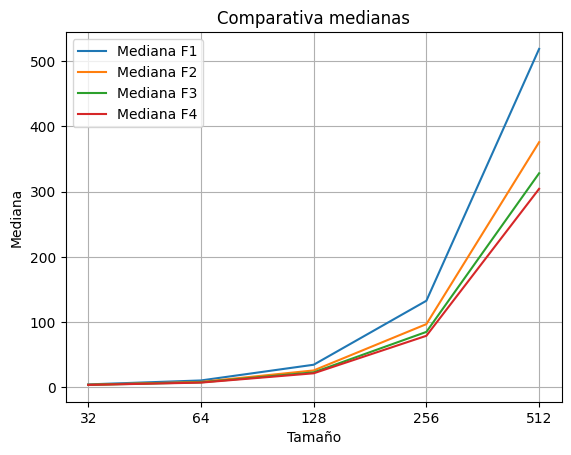

In [25]:
import matplotlib.pyplot as plt
plt_arr_f1 = []
plt_arr_f2 = []
plt_arr_f3 = []
plt_arr_f4 = []
plt_xlabel = []
for i in range(5):
    plt_arr_f1.append(medianas_f1[i])
    plt_arr_f2.append(medianas_f2[i])
    plt_arr_f3.append(medianas_f3[i])
    plt_arr_f4.append(medianas_f4[i])
    plt_xlabel.append(ns[i])
plt.plot(plt_arr_f1)
plt.plot(plt_arr_f2)
plt.plot(plt_arr_f3)
plt.plot(plt_arr_f4)
plt.grid()
plt.legend(["Mediana F1", "Mediana F2", "Mediana F3", "Mediana F4"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("Mediana")
plt.show()
plt.close()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

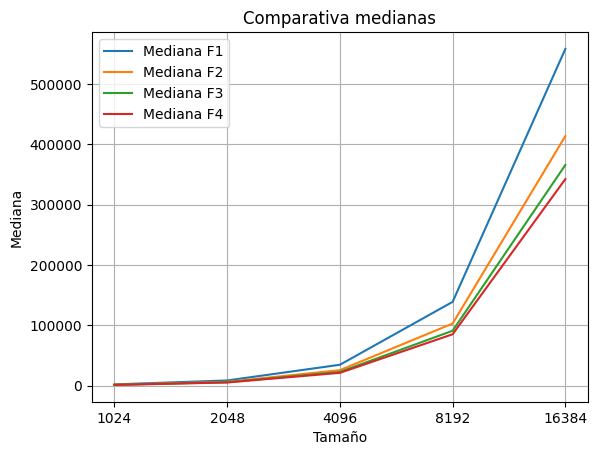

In [26]:
plt_arr_f1 = []
plt_arr_f2 = []
plt_arr_f3 = []
plt_arr_f4 = []
plt_xlabel_2 = []
for i in range(5):
    plt_arr_f1.append(medianas_f1[i+5])
    plt_arr_f2.append(medianas_f2[i+5])
    plt_arr_f3.append(medianas_f3[i+5])
    plt_arr_f4.append(medianas_f4[i+5])
    plt_xlabel_2.append(ns[i+5])
plt.plot(plt_arr_f1)
plt.plot(plt_arr_f2)
plt.plot(plt_arr_f3)
plt.plot(plt_arr_f4)
plt.grid()
plt.legend(["Mediana F1", "Mediana F2", "Mediana F3", "Mediana F4"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("Mediana")
plt.show()
plt.close()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

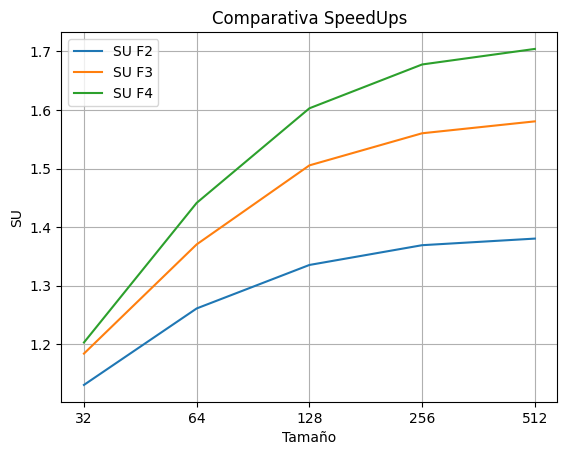

In [37]:
#La funcion mas lenta es F1
SU1 = []
SU2 = []
SU3 = []
for i in range(5):
    SU1.append(medianas_f1[i]/medianas_f2[i])
    SU2.append(medianas_f1[i]/medianas_f3[i])
    SU3.append(medianas_f1[i]/medianas_f4[i])
plt.plot(SU1)
plt.plot(SU2)
plt.plot(SU3)
plt.grid()
plt.legend(["SU F2", "SU F3", "SU F4"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("SU")
plt.show()
plt.close()


k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

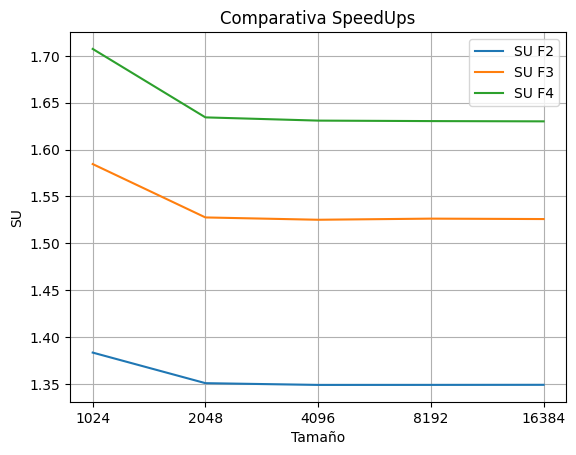

In [38]:
SU1 = []
SU2 = []
SU3 = []
for i in range(5):
    SU1.append(medianas_f1[i+5]/medianas_f2[i+5])
    SU2.append(medianas_f1[i+5]/medianas_f3[i+5])
    SU3.append(medianas_f1[i+5]/medianas_f4[i+5])
plt.plot(SU1)
plt.plot(SU2)
plt.plot(SU3)
plt.grid()
plt.legend(["SU F2", "SU F3", "SU F4"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("SU")
plt.show()
plt.close()


l) Implementar (en un único archivo) dos funciones en C que acumulen los elementos de una matriz cuadrada de números reales. Debe emplear dos bucle `for`. En la primera función realizar la acumulación leyendo los elementos por filas, en la segunda acumule leyendo los elementos por columnas. (1.5 ptos)

In [29]:
%%file lib_funciones_2.c
double func_filas(unsigned long long N, double *matrix){
    double ac = 0;
    
    for(unsigned long long i = 0; i <= (N*(N)); i+=N){
        double ac_fila = 0;
        for(unsigned long long j = 0; j <= N; j++){
            ac_fila = ac_fila + matrix[j+i];
        }
        ac = ac + ac_fila;
    }
    return ac;
}
double func_columnas(unsigned long long N, double *matrix){
    double ac = 0;
    for(unsigned long long i = 0; i <= N; i++){
        double ac_columna = 0;
        for(unsigned long long j = 0; j <= (N*(N)); j+=N){
            ac_columna = ac_columna + matrix[j+i];
        }
        ac = ac + ac_columna;
    }
    return ac;
}


Overwriting lib_funciones_2.c


m) Coloque el comando para generar la librería dinámica del ítem (l) y genere la librería dinámica. (0.25 ptos)

In [30]:
! gcc -fPIC -shared lib_funciones_2.c -o lib_funciones_2.so

n) Implemente una función que vincule la librería dinámica generada en el ítem (m) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las dos funciones configuradas listas para su uso. (0.5 ptos)

In [31]:
import ctypes
import numpy
def llamado_c_2():
    lib =ctypes.CDLL("./lib_funciones_2.so")
    lib.func_filas.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_filas.restype = ctypes.c_double
    lib.func_columnas.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_columnas.restype = ctypes.c_double
    return lib.func_filas, lib.func_columnas

o) Haga una instancia de las dos funciones a partir de su función en el ítem (n) (0.25 ptos)

In [32]:
f_filas, f_columnas = llamado_c_2()

p) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [35]:
n_2 = ns[0]
A_2 = numpy.random.rand(n_2,n_2)
Y_2 = A_2.flatten()
print(f_filas(n_2,Y_2))
print(f_columnas(n_2, Y_2))

562.4159556262993
562.4159556262994


q) Pruebe todas sus funciones obtenidas en el ítem (o) para el menor de los valores de `ns` y muestre que dan el mismo resultado. (0.25 ptos)

In [34]:
n_2 = ns[-1]
A_2 = numpy.random.rand(n_2,n_2)
Y_2 = A_2.flatten()
print(f_filas(n_2,Y_2))
print(f_columnas(n_2, Y_2))

134244236.49292588
134244236.4929261


r) Realice 50 mediciones de tiempo para todas sus funciones obtenidas en el ítem (o), y para todos los valores de `ns`. El valor representativo de las 20 mediciones será la mediana. (0.5 ptos)

In [36]:

medianas_columnas = []
medianas_filas = []
for n in ns:
    time_columnas = []
    time_filas = []
    A = numpy.random.rand(n,n)
    Y = A.flatten()
    for i in range(iter):
        tic3 = time.perf_counter()
        f_columnas(n,Y)
        tic2 = time.perf_counter()
        f_filas(n,Y)
        tic1 = time.perf_counter()
        time_columnas.append(1e6*(tic2-tic3))
        time_filas.append(1e6*(tic1-tic2))
    medianas_columnas.append(statistics.median(time_columnas))
    medianas_filas.append(statistics.median(time_filas))

s) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

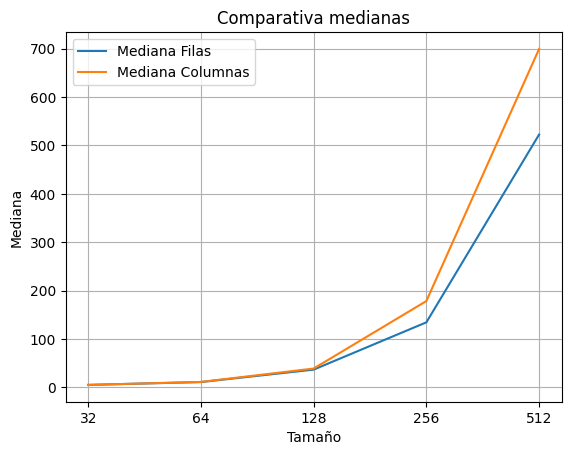

In [50]:
plt_arr_filas = []
plt_arr_columnas = []
for i in range(5):
    plt_arr_filas.append(medianas_filas[i])
    plt_arr_columnas.append(medianas_columnas[i])
plt.plot(plt_arr_filas)
plt.plot(plt_arr_columnas)
plt.grid()
plt.legend(["Mediana Filas", "Mediana Columnas"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("Mediana")
plt.show()
plt.close()

t) Presente una gráfica en la que muestre como varía el tiempo de ejecución de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

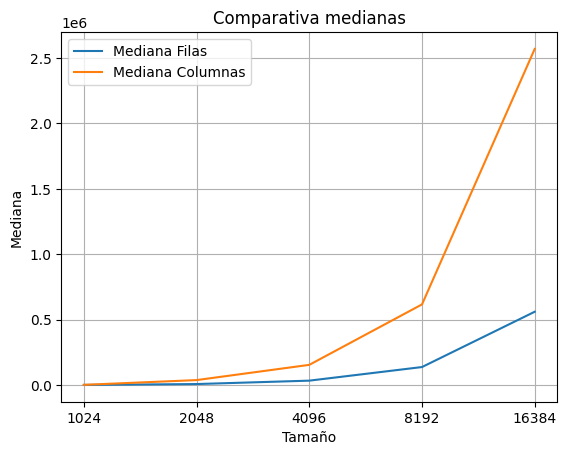

In [51]:
plt_arr_filas = []
plt_arr_columnas = []
for i in range(5):
    plt_arr_filas.append(medianas_filas[i+5])
    plt_arr_columnas.append(medianas_columnas[i+5])
plt.plot(plt_arr_filas)
plt.plot(plt_arr_columnas)
plt.grid()
plt.legend(["Mediana Filas", "Mediana Columnas"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("Mediana")
plt.show()
plt.close()

u) Presente una gráfica en la que muestre como varía el *speedup* de las instancias del ítem (o) respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia la función más lenta. (0.25 ptos)

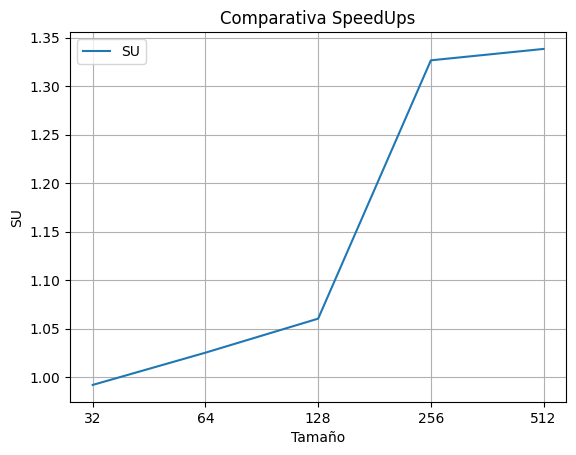

In [48]:
SU = []
for i in range(5):
    SU.append(medianas_columnas[i]/medianas_filas[i])
plt.plot(SU)
plt.grid()
plt.legend(["SU"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("SU")
plt.show()
plt.close()


v) Compare graficamente las implementaciones de las versiones con un solo bucle `for`, con las implementaciones de las versiones con dos bucle `for`. Presente una gráfica de tiempo de ejecución para todos los tamaños, determine cual es la más rápida y cual es la más lenta. (0.5 ptos)

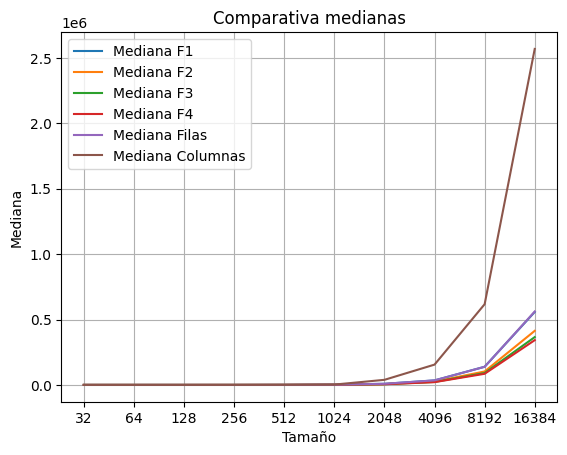

In [54]:
plt.plot(medianas_f1)
plt.plot(medianas_f2)
plt.plot(medianas_f3)
plt.plot(medianas_f4)
plt.plot(medianas_filas)
plt.plot(medianas_columnas)
plt.grid()
plt.legend(["Mediana F1", "Mediana F2", "Mediana F3", "Mediana F4", "Mediana Filas", "Mediana Columnas"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(ns)), ns)
plt.ylabel("Mediana")
plt.show()
plt.close()
#de la gráfica, el más rapido es F4, el cual es cuando se agrupan de 4 en 4 (para determinar esto, realice la grafica sin mediana_columnas, puesto que es un valor muy grande)
#tambie, se puede observar que el método mas lento es medianas_columnas
#En general, todos los metodos del primer archivo en c creado son más rapidos que los del segundo archivo

w) En base al análisis del ítem (v), presente dos gráficas de *speedup* (de la función más rápida respecto de la más lenta). Una para los primeros cinco tamaños, y otra para los cinco últimos. (0.25 ptos)

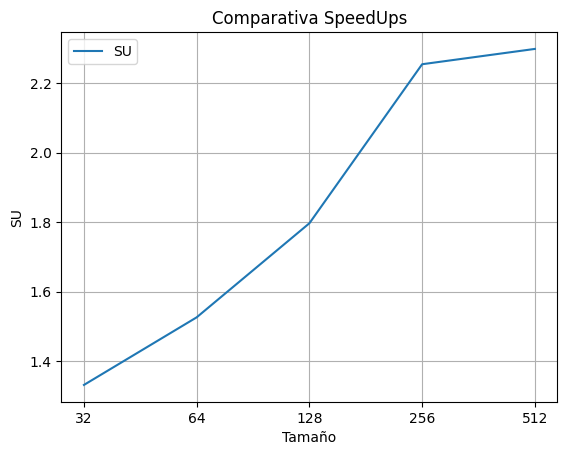

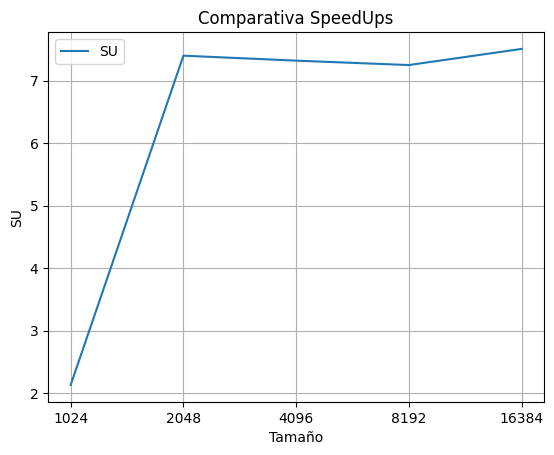

In [57]:
SU = []
for i in range(5):
    SU.append(medianas_columnas[i]/medianas_f4[i])
plt.plot(SU)
plt.grid()
plt.legend(["SU"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("SU")
plt.show()
plt.close()
SU = []
for i in range(5):
    SU.append(medianas_columnas[i+5]/medianas_f4[i+5])
plt.plot(SU)
plt.grid()
plt.legend(["SU"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("SU")
plt.show()
plt.close()



x) Explique sus resultados de las implementaciones con un solo bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

De la grafica de las medianas, se puede apreciar que hay una disminución significativa en el tiempo de ejecucion entre F1 y el resto de funciones. Esto se debe a que con las demás funciones, debido a la cantidad de datos que se agrupa con cada bucle for, se aplica la localidad espacial, lo cual disminuye los tiempos de ejecución. Además tiene sentido que mientras más grande sea la cantidad de datos agrupados, el tiempo de ejecución es más pequeño.

y) Explique sus resultados de las implementaciones con dos bucle `for` empleando conceptos de memoria caché. (2.0 ptos)

De la misma manera que en las funciones con un solo bucle for, en este caso el mas lento es el método que agrupa columnas; esto debido a que se aplica mejor la localidad temporal en la funcion que agrupa filas.

z) ¿Qué implementación para sumar todos los elementos de una matriz es más eficiente en términos de tiempo de ejecución? ¿Por qué? Explique empleando conceptos de memoria caché. (1.0 pto)

Fue la que agrupaba elementos de 4 en 4, con un solo bucle for. Primero, porque utiliza 1 solo bucle for a comparacion de las que utilizan 2 bucles for. A partir de ello, las que usan 1 solo bucle for tienen ventaja; de estas, la que mejor aplica localidad espacial es la que va de 4 en 4.